# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#insights">Analysis and Visualization</a></li>
</ul>


<a id='intro'></a>

## Introduction

**Background**

This project aims at wrangling the tweet archive of the twitter user [@dog_rates](https://twitter.com/dog_rates), then eventually creating interesting and trustworthy analyses and visualizations.

The twitter account rates people's dogs with humorous content about the dog.

To give more information about a particular tweet, we'll scrape more tweet info like the number of likes and retweets from the twitter account. Additionally, there are image predictions for breed of a dog provided.

<img src="images/dog_image.jpeg">


**Datasets**

1. Twitter Archive Data :- Contains basic tweet data for over 2000 tweetw from WeRateDogs account

2. Tweet Json :- Additional information about the tweets gathered from Twitter's API

2. Image Predictions :- Image predictions for dog breeds


<a id='gather'></a>

## Data Gathering

In this step, we'll gather the following data and load them in the notebook:
- WeRateDogs tweets
- Tweet Image predictions
- Additional info: Counts of retweets and likes of the tweets


In [1]:
# Libraries required
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from bs4 import BeautifulSoup
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style = 'darkgrid')

**1. Loading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [2]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**2. Tweet image predictions**

Using the requests library, we'll load this data from the url provided

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
pred_response = requests.get(url, stream = 1)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(pred_response.content)


image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [4]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**3. Additional Data about the tweets**

We'll use tweepy library to scrape count of likes and retweets of the tweet ids in the archive data into a txt file

In [5]:
# Authenticating twitter API

# keys
consumer_key = "*****"
consumer_secret = "****"
access_token = "*****"
access_token_secret = "*****"

#authentication 

try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)
except:
    print("An error occurred during the authentication, please retry")



In [ ]:
# test for the exception
try:
    tweet_test = api.get_status(888202515573088257)
    print(tweet_test)
except tweepy.TweepyException as e:
    try:
        print(e.args[0].split('- ')[1])
    except:
        print(e)


In [6]:
# extracting each tweet id's json data

error_ids = []   #list of tweet ids that encounter any error during scraping
tweet_array = []

# extracting tweet information
for id in archive_data['tweet_id']:
    try:
        tweet = api.get_status(id)
        tweet_array.append(tweet._json)

    except tweepy.TweepyException as e:
            try:
                error_message = e.args[0].split('- ')[1]
            except:
                error_message = e
                
            error_ids.append({'id': id, 'Error': error_message})
            print('Error loading id', id, 'Reason:-', error_message)
            continue

Error loading id 888202515573088257 Reason:- No status found with that ID.
Error loading id 873697596434513921 Reason:- No status found with that ID.
Error loading id 872668790621863937 Reason:- No status found with that ID.
Error loading id 872261713294495745 Reason:- No status found with that ID.
Error loading id 869988702071779329 Reason:- No status found with that ID.
Error loading id 866816280283807744 Reason:- No status found with that ID.
Error loading id 861769973181624320 Reason:- No status found with that ID.
Error loading id 856602993587888130 Reason:- No status found with that ID.
Error loading id 856330835276025856 Reason:- Sorry, that page does not exist.
Error loading id 851953902622658560 Reason:- No status found with that ID.
Error loading id 851861385021730816 Reason:- No status found with that ID.
Error loading id 845459076796616705 Reason:- No status found with that ID.
Error loading id 844704788403113984 Reason:- No status found with that ID.
Error loading id 84289

Rate limit reached. Sleeping for: 206


In [7]:
print('Extracted tweets:', len(tweet_array))
print('Tweets that could not be extracted:', len(error_ids))

Extracted tweets: 2327
Tweets that could not be extracted: 29


In [9]:
# write the json array into a text file
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_array, indent = 4))

In [10]:
# write the error ids into a text file
with open('error_ids.txt', 'w') as file:
    file.write(json.dumps(error_ids, indent = 4))

In [6]:
# Reading json file into a dataframe

# lists of the outputs
ids = []
num_likes = []
num_retweets = []
retweeted = []

with open('tweet_json.txt', 'r') as f:
    data = json.load(f)

    for line in data:
        ids.append(line['id'])
        num_likes.append(line['favorite_count'])
        num_retweets.append(line['retweet_count'])
        retweeted.append(line['retweeted'])

output_dict = {'tweet_id': ids, 'favourites_count': num_likes, 'retweets_count': num_retweets, 'retweeted': retweeted}       
tweet_json = pd.DataFrame.from_dict(output_dict)       

tweet_json.head(2)

,tweet_id,favourites_count,retweets_count,retweeted
0,892420643555336193,33809,7010,False
1,892177421306343426,29330,5302,False


<a id='assess'></a>

## Assessing Data

In this section, we'll detect quality and tidiness issues in each of the datasets using visual and programmatic assessment. 

#### 1. Archive Data


**Visual Assessment**

In [7]:
archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


***Observations***

- Some english words like 'a, an, such, quite and the' are extracted as dog names 
- Most records in the *'text'* column have urls, which direct to the same pages as the urls in *'expanded_url'* column
- Some records in expanded_urls have duplicates, separated by commas
- Some of the tweet_ids are for retweets
- The dog stage columns can be melted into one column

**Programmatic Assessment**

In [8]:
# shape of dataframe
print('The dataframe has', archive_data.shape[0], 'rows and', archive_data.shape[1], 'columns')

The dataframe has 2356 rows and 17 columns


In [9]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Checking for duplicates
archive_data[archive_data.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


The archive dataset doesn't have any duplicates

In [11]:
archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
archive_data['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

***Take Aways***

- Timestamp datatype is object instead of datetime
- Outliers in rating numerator and denominator
- Missing data in some columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Source column has html tags


#### 2. Image Predictions

**Visual Assesment**

In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


***Observation***

- Some records have a False value in the columns p1_dog, p2_dog and p3_dog, meaning the images are not for dogs

**Programmatic Assessment**

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


***Take Away***

- The number of tweets in the image predictions (2075) is less than the tweets in the archive data (2356)

#### 3. Additional Tweet Information

**Visual Assessment**

In [16]:
tweet_json

,tweet_id,favourites_count,retweets_count,retweeted
0,892420643555336193,33809,7010,False
1,892177421306343426,29330,5302,False
2,891815181378084864,22062,3482,False
3,891689557279858688,36918,7219,False
4,891327558926688256,35286,7765,False
...,...,...,...,...
2322,666049248165822465,89,37,False
2323,666044226329800704,246,115,False
2324,666033412701032449,100,36,False
2325,666029285002620928,112,39,False


There are 2327 records in this dataset

**Programmatic Assessment**

In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2327 non-null   int64
 1   favourites_count  2327 non-null   int64
 2   retweets_count    2327 non-null   int64
 3   retweeted         2327 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


In [18]:
tweet_json.describe()

,tweet_id,favourites_count,retweets_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7054.327031,2472.322733
std,6.820795e+16,10960.168135,4186.869516
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1225.500000,495.000000
50%,7.178418e+17,3052.000000,1149.000000
75%,7.986547e+17,8606.000000,2863.500000
max,8.924206e+17,144865.000000,70787.000000


***Take Away***

- The number of tweets from the scraped data (2327) is less than those in the archive dataset

In [19]:
# Duplicated column names in all the three dataframes
df_columns = pd.Series(list(archive_data) + list(image_predictions) + list(tweet_json))
df_columns[df_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

We only need two tables; one for the image predictions and another with all details about a tweet. Therefore, the archive data and scraped data will be merged.

### Quality issues

1. Incorrect datatype for timestamp

2. Some tweets in the archive data are retweets and not original

3. Incorrectly extracted ratings

4. Incorrect dog names like such, a, an, the, quite

5. Html tags in the source column

6. Duplicate urls in expanded_url column

7. False values in p1_dog, p2_dog, p3_dog columns are not images of dogs

8. Some tweets in the scraped tweets are retweets and not original



### Tidiness issues

1. Remove urls from text column

2. Combine doggo, floofer, pupper and puppo columns into one

3. Merge the tables



<a id='clean'></a>

## Cleaning Data

First, we'll make copies of the three datasets then clean all the issues identified in the assessment step


In [20]:
# Making copies of original pieces of data
archive_clean = archive_data.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()


### Issue #1: Incorrect datatype for timestamp

#### Define:

Timestamp column is of string datatype. We'll convert it to datetime to correctly depict what the column represents.

#### Code

In [21]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Retweets in archive data

#### Define

Some records in the archive data are retweets. This is shown by the records having values in the column *'retweeted_status_id'*. We'll remove all retweets so that we only remain with original tweets in our data

Additionally, the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
 'retweeted_status_user_id' and 'retweeted_status_timestamp' are only associated with retweets. Therefore they'll be dropped from the dataframe.


#### Code

In [23]:
retweets = archive_clean[archive_clean['retweeted_status_id'].notnull()]
retweet_ids = retweets['tweet_id'].to_list()

archive_clean = archive_clean[~archive_clean['tweet_id'].isin(retweet_ids)]


In [24]:
# removing columns associated with retweets
cols_to_remove = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
 'retweeted_status_user_id', 'retweeted_status_timestamp']
 
archive_clean.drop(columns= cols_to_remove, inplace=True)

#### Test

In [25]:
archive_clean.sample(3)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
449,819004803107983360,2017-01-11 02:15:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1100,735648611367784448,2016-05-26 01:47:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,https://twitter.com/dog_rates/status/735648611...,12,10,None,None,None,pupper,None


In [26]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: Incorrect ratings

#### Define:

WeRateDogs has a [unique rating system](https://knowyourmeme.com/memes/theyre-good-dogs-brent) where rating numerator can be greater than the denominators. However, some tweets' ratings are not properly extracted

We'll identify such tweets and replace the ratings with the correct values where possible. Tweets that don't have ratings will be eliminated from the data

#### Code

In [30]:
# ratings with decimals
decimal_rating_ptn = r"(\d+\.\d*)\/(\d+)"

decimal_ratings = archive_clean[archive_clean['text'].str.contains(decimal_rating_ptn)]

decimal_ratings['rating_numerator'] = decimal_ratings['text'].str.extract(decimal_rating_ptn)[0]
decimal_ratings['rating_denominator'] = decimal_ratings['text'].str.extract(decimal_rating_ptn)[1]


In [63]:

# replace decimal ratings with the correct ones
archive_clean.loc[decimal_ratings.index.to_list(), ['rating_numerator']] = decimal_ratings['rating_numerator']
archive_clean.loc[decimal_ratings.index.to_list(), ['rating_denominator']] = decimal_ratings['rating_denominator']

In [28]:
# dropping records that don't actually have ratings
archive_clean = archive_clean[~archive_clean['tweet_id'].isin([832088576586297345,810984652412424192])]

# changing incorrect ratings
rate_numerators = {835246439529840640: 13, 740373189193256964: 14, 722974582966214656:13,
                    716439118184652801:11, 682962037429899265:10, 666287406224695296:9}
rate_denominators = {835246439529840640: 10, 740373189193256964: 10, 722974582966214656:10,
                    716439118184652801:10, 682962037429899265:10, 666287406224695296:10}

archive_clean['rating_numerator'] = archive_clean['tweet_id'].map(rate_numerators)
archive_clean['rating_denominator'] = archive_clean['tweet_id'].map(rate_denominators)


#### Test

In [64]:
# decimal ratings
archive_clean[archive_clean['text'].str.contains(decimal_rating_ptn)].sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,dog_stage
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NoneNonepupperNone,Pupper
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NoneNoneNoneNone,None


In [32]:
archive_clean[archive_clean['tweet_id'] == 835246439529840640]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13.0,10.0,None,None,None,None,None


### Issue #4: Incorrect dog names

#### Define: 

The column containing name of the dog contains words like a, an, such, among others, which are not particularly dog names. These invalid names are in lowercase.

To remove the names, we'll simply find all words in lowercase and remove the records with those names from the dataset

#### Code

In [33]:
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [34]:
# removing the words in lower case
archive_clean = archive_clean[archive_clean.name.str.contains('^[A-Z]', regex = True)]

#### Test

In [35]:
archive_clean['name'].value_counts()

None          679
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 931, dtype: int64

#### Issue 5. Html tags in source column

#### Define:

The exact sources of tweets are within the html tags in the source column. We'll extract the texts and replace the html tags with those texts.

#### Code

In [36]:
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1945
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          87
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [37]:
# extracting the texts from the html tags
archive_clean['source'] = [BeautifulSoup(row, 'html.parser').text for row in archive_clean['source']]

#### Test

In [38]:
archive_clean['source'].value_counts()

Twitter for iPhone     1945
Vine - Make a Scene      87
Twitter Web Client       27
TweetDeck                10
Name: source, dtype: int64

#### Issue #6. Duplicates in expanded_urls column

#### Define:

Some records in this column have duplicates, separated by commas. We'll remove the duplicates and remain with only one url for each record. 

#### Code

In [39]:
archive_clean['expanded_urls'] = archive_clean['expanded_urls'].str.split(',', expand = True)[0]
archive_clean.sort_values(by=['tweet_id'], ascending = False, inplace = True)


#### Test

In [40]:
archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2214,668544745690562560,2015-11-22 21:41:02+00:00,Twitter for iPhone,It is an honor to rate this pup. He is a Snork...,https://twitter.com/dog_rates/status/668544745...,NaN,NaN,None,None,None,None,None
1525,690400367696297985,2016-01-22 05:07:29+00:00,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,NaN,NaN,Eriq,None,None,None,None


### Issue #7: Retweets in tweet_json

#### Define:

Information about the retweets in the archive data might have been scraped from the Twitter API. In this step, we'll remove such tweets from the tweet_json dataframe

#### Code

In [41]:
tweet_json_clean = tweet_json_clean[~tweet_json_clean['tweet_id'].isin(retweet_ids)]

#### Test

In [42]:
tweet_json_clean.shape

(2167, 4)

In [43]:
tweet_json_clean.head(2)

,tweet_id,favourites_count,retweets_count,retweeted
0,892420643555336193,33809,7010,False
1,892177421306343426,29330,5302,False


### Issue #8: Entries with False in p1_dog, p2_dog and p3_dog

#### Define:

In the image_predictions data, tweet_ids with a 'False' value in the columns p1_dog, p2_dog and p3_dog are not dog images. We'll remove such records from the data.

#### Code

In [44]:
non_dog_images = image_predictions_clean[(image_predictions_clean['p1_dog'] == False) & 
(image_predictions_clean['p2_dog'] == False) & (image_predictions_clean['p2_dog'] == False)]

image_predictions_clean = image_predictions_clean.drop(non_dog_images.index)

#### Test

In [45]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True


In [46]:
image_predictions.shape

(2075, 12)

### Issue #9: URLs in text column

#### Define

The text column has urls that redirect to the same urls in the expanded_url column. We'll remove these urls so that we remain with text only in this column

#### Code

In [47]:
url_regex = r'''(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.]
(?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)
\b/?(?!@)))'''


archive_clean['text'] = archive_clean['text'].str.replace(url_regex, "").str.strip()

#### Test

In [48]:
archive_clean['text'][2]

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10'

### Issue #10: Merging dog stages into one

#### Define

The four last columns of archive data all fall under one category; dog stage. However, there are some tweets that have more than one dog stage. We'll tidy up the records then combine the stages into one column

#### Code

In [49]:
archive_clean['stages'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']
archive_clean['stages'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [50]:
def clean_dogstage(data):
    if data['stages'].count('None') < 3:
        return 'Multiple' #this means it has more than one dog stage
    
    elif data['stages'].count('doggo') == 1:
        return 'Doggo'
    elif data['stages'].count('floofer') == 1:
        return 'Floofer'
    elif data['stages'].count('pupper') == 1:
        return 'Pupper'
    elif data['stages'].count('puppo') == 1:
        return 'Puppo'
    else:
        return 'None'

archive_clean['dog_stage'] = archive_clean.apply(clean_dogstage, axis = 1)
archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [51]:
archive_clean['dog_stage'].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Multiple'],
      dtype=object)

In [52]:
archive_clean.shape

(2069, 10)

### Issue #11: Merging the tables

#### Define:

All the three tables have information pertaining to a particular tweet. In this final process, we'll merge all the three tables to create one dataframe with all information about a tweet.


#### Code

In [53]:
print('Archive data has', archive_clean.shape[0], 'records')
print('Image predictions dataset has', image_predictions_clean.shape[0], 'records')
print('tweet_json data has', tweet_json_clean.shape[0], 'records')

Archive data has 2069 records
Image predictions dataset has 1687 records
tweet_json data has 2167 records


In [54]:
tweets_data = archive_clean.merge(tweet_json_clean, how = 'left').merge(image_predictions_clean, how = 'left')

#### Test

In [55]:
tweets_data.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
529,789986466051088384,2016-10-23 00:27:05+00:00,Twitter for iPhone,This is Happy. He's a bathtub reviewer. Seems ...,https://twitter.com/dog_rates/status/789986466...,NaN,NaN,Happy,NoneNoneNoneNone,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,715928423106027520,2016-04-01 15:46:52+00:00,Twitter for iPhone,This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,NaN,NaN,Bubbles,NoneNoneNoneNone,None,...,1.0,pug,0.976685,True,French_bulldog,0.019663,True,bull_mastiff,0.002278,True
657,768970937022709760,2016-08-26 00:38:52+00:00,Twitter Web Client,This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,NaN,NaN,Kirby,NoneNoneNoneNone,None,...,1.0,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False


<a id='store'></a>

## Storing Data

In this step, we'll save our final gathered, assessed and cleaned master dataset to a csv file.


In [56]:
tweets_data.to_csv('twitter_archive_master.csv', index = False)

<a id='insights'></a>

## Analyzing and Visualizing Data

In this section, we'll analyze and visualize our combined dataset

The analysis will seek to answer the following questions:-

1. What's the mean rating for the dogs?
2. What dog stage has the highest number of likes?
3. What's the most common dog name?

In [57]:
# loading the combined dataset
df = pd.read_csv('twitter_archive_master.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2069 non-null   int64  
 1   timestamp           2069 non-null   object 
 2   source              2069 non-null   object 
 3   text                2069 non-null   object 
 4   expanded_urls       2012 non-null   object 
 5   rating_numerator    10 non-null     float64
 6   rating_denominator  10 non-null     float64
 7   name                2069 non-null   object 
 8   stages              2069 non-null   object 
 9   dog_stage           2069 non-null   object 
 10  favourites_count    2061 non-null   float64
 11  retweets_count      2061 non-null   float64
 12  retweeted           2061 non-null   object 
 13  jpg_url             1547 non-null   object 
 14  img_num             1547 non-null   float64
 15  p1                  1547 non-null   object 
 16  p1_con

In [58]:
# converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [59]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,favourites_count,retweets_count,img_num,p1_conf,p2_conf,p3_conf
count,2.069000e+03,10.000000,10.0,2061.000000,2061.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,7.387023e+17,11.628000,10.0,7688.876759,2260.664241,1.221073,0.607633,0.137707,0.061753
std,6.776306e+16,1.641786,0.0,11207.334819,4011.272343,0.582403,0.266213,0.101423,0.052502
min,6.660209e+17,9.500000,10.0,45.000000,1.000000,1.000000,0.044333,0.000010,0.000001
25%,6.776984e+17,10.250000,10.0,1708.000000,492.000000,1.000000,0.379210,0.055249,0.015413
50%,7.116527e+17,11.265000,10.0,3499.000000,1087.000000,1.000000,0.607401,0.121779,0.049656
75%,7.923946e+17,13.000000,10.0,9563.000000,2595.000000,1.000000,0.856915,0.198869,0.095772
max,8.924206e+17,14.000000,10.0,144865.000000,70787.000000,4.000000,0.999984,0.467678,0.273419


**Insight #1**

The mean dog rating  is 11.63

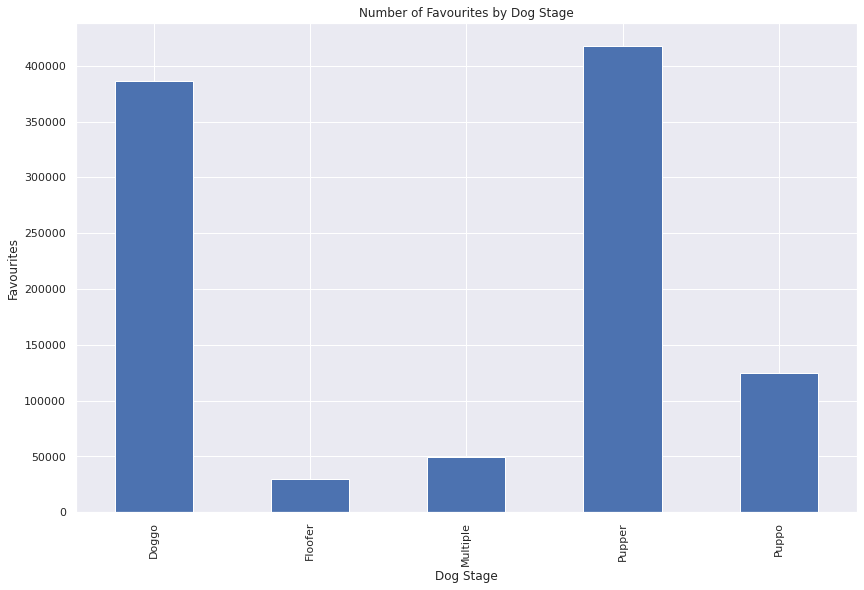

In [61]:
# number of likes
df1 = df[df['dog_stage'] != 'None']

df1.groupby(['dog_stage'])['retweets_count'].sum().plot(kind='bar', figsize = (14, 9),
title = 'Number of Favourites by Dog Stage', xlabel = 'Dog Stage', ylabel = 'Favourites');

**Insight #2**

Puppers have the highest number of likes

In [62]:
df['name'].value_counts()

None          679
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 931, dtype: int64

**Insight #3**

Lucy and Charlie are the most common dog names